<a href="https://colab.research.google.com/github/cesaraugustt/Trabalho-ML/blob/main/Trabalho_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Machine Learning: Classificação de Pinguins Palmer

## 1. Contextualização do Dataset

### Introdução
O objetivo deste projeto é desenvolver um modelo de aprendizado de máquina capaz de classificar espécies de pinguins (Adelie, Chinstrap e Gentoo) com base em suas características físicas e geográficas.

O dataset utilizado é o **Palmer Archipelago (Antarctica) penguin data**, coletado pela Dr. Kristen Gorman e pela Estação Palmer (LTER). Ele é amplamente utilizado como uma alternativa moderna ao clássico dataset "Iris" para tarefas de classificação e visualização de dados.

### Descrição dos Dados
O conjunto de dados contém as seguintes variáveis (features):
- **species**: A espécie do pinguim (Target/Alvo).
- **island**: A ilha onde o pinguim foi encontrado (Biscoe, Dream ou Torgersen).
- **culmen_length_mm**: Comprimento do cúlmen (bico) em mm.
- **culmen_depth_mm**: Profundidade do cúlmen (bico) em mm.
- **flipper_length_mm**: Comprimento da nadadeira em mm.
- **body_mass_g**: Massa corporal em gramas.
- **sex**: Sexo do pinguim.

In [4]:
!pip install kagglehub[pandas-datasets] --quiet

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

In [7]:
file_path = "penguins_size.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "parulpandey/palmer-archipelago-antarctica-penguin-data",
  file_path,
)

Using Colab cache for faster access to the 'palmer-archipelago-antarctica-penguin-data' dataset.


In [11]:
print("--- Primeiras linhas ---")
display(df.head())

print("\n--- Informações Gerais ---")
df.info()

print("\n--- Nulos por Coluna ---")
print(df.isnull().sum())

print("\n--- Valores únicos ---")
print(df.nunique())

--- Primeiras linhas ---


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE



--- Informações Gerais ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB

--- Nulos por Coluna ---
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

--- Valores únicos ---
species                3
island                 3
culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     55
body_mass_g           94
se

## Preparação dos Dados

In [12]:
print(df['sex'].value_counts())

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


In [17]:
moda_sex = df['sex'].mode()[0]
df['sex'] = df['sex'].replace('.', moda_sex)
df['sex'] = df['sex'].fillna(moda_sex)

In [21]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

for col in numeric_columns:
    median = df[col].median()
    df[col] = df[col].fillna(median)

In [22]:
print(df.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


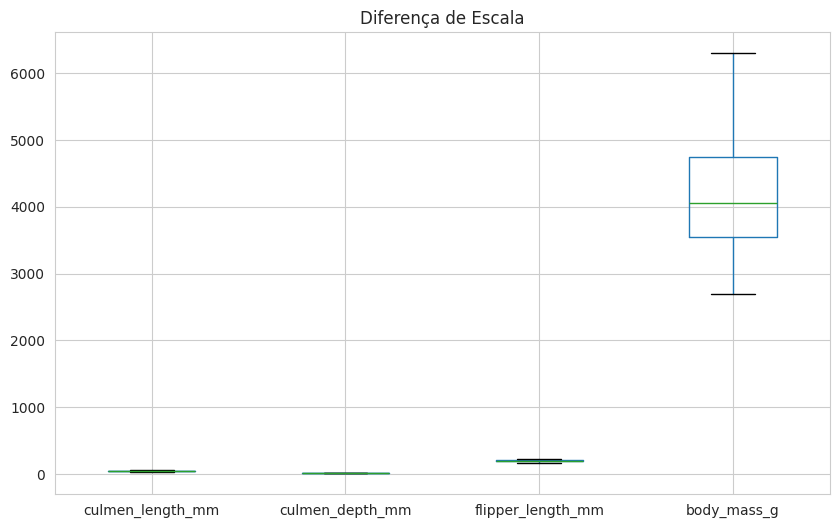

In [23]:
plt.figure(figsize=(10, 6))
numeric_columns.boxplot()
plt.title("Diferença de Escala")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = df.drop('species', axis=1)
y = df['species']

# Codificação do Target
map_species = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
y = df['species'].map(map_species)

# Codificação das Features Categóricas (Get Dummies / One-Hot Encoding)
X = pd.get_dummies(X, columns=['island', 'sex'], drop_first=True)

In [25]:
print("Classes Y:", y.unique())
print("Colunas X criadas:", X.columns.tolist())

Classes Y: [0 1 2]
Colunas X criadas: ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
cols_to_scale = numeric_columns.columns

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
display(X_train.head())

X_train shape: (275, 7)
X_test shape: (69, 7)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
98,-2.005582,-0.534871,-1.642552,-1.634638,True,False,False
114,-0.817283,1.761064,-0.706755,-0.386909,False,False,False
118,-1.530262,-0.085667,-0.850724,-1.073160,False,True,False
303,1.083994,-0.634694,1.668728,1.422297,False,False,True
343,1.065713,-0.534871,0.876900,1.484684,False,False,True


## Exploração e Visualização dos Dados

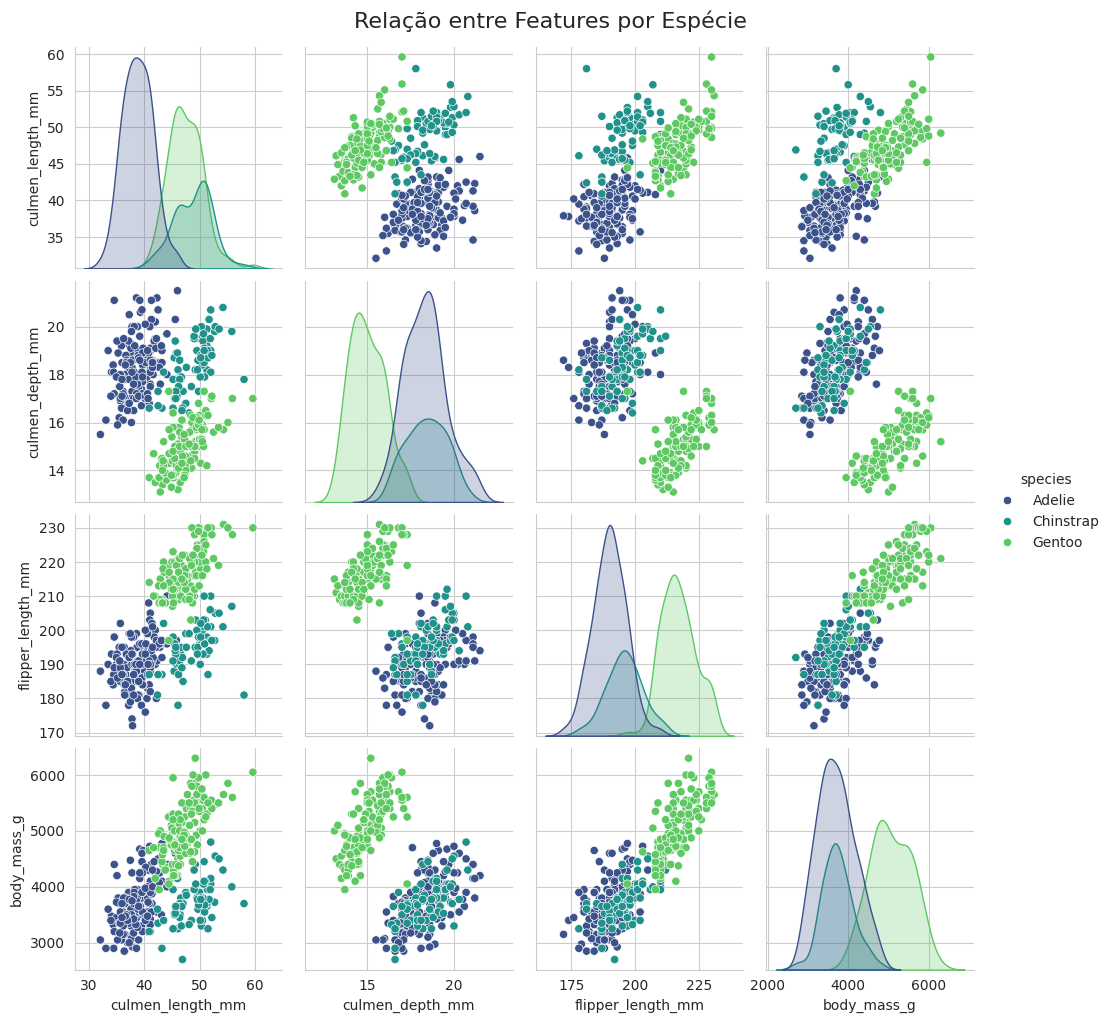

In [37]:
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle("Relação entre Features por Espécie", y=1.02, fontsize=16)
plt.show()

O pairplot mostra como as medidas corporais variam entre as espécies. Pinguins Gentoo aparecem consistentemente maiores em comprimento de bico, tamanho das barbatanas e massa corporal. Adelie formam um grupo mais compacto, com valores menores e pouca variação. Chinstrap apresentam valores intermediários e, em alguns casos, sobreposição com outras espécies. As variáveis que mais diferenciam as espécies visualmente são flipper_length_mm, body_mass_g e culmen_length_mm.

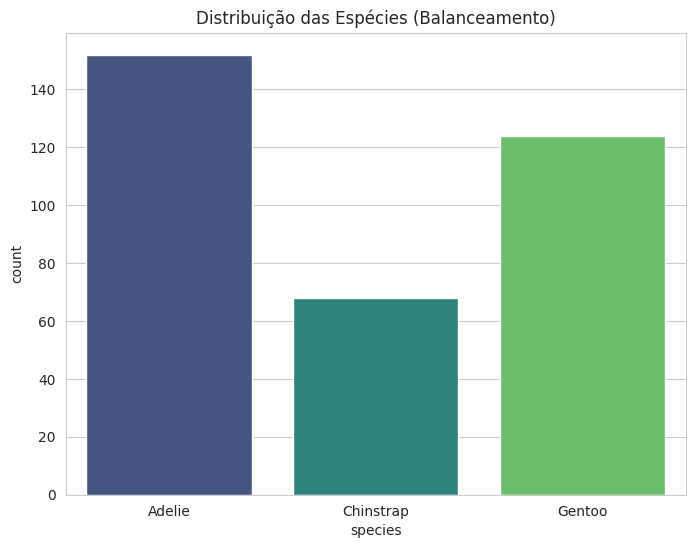

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='species', hue='species', data=df, palette='viridis')
plt.title('Distribuição das Espécies (Balanceamento)')
plt.show()

O gráfico de barras revela que a espécie Adelie é a mais numerosa no conjunto de dados, seguida pela Gentoo. A espécie Chinstrap possui a menor quantidade de registros. Apesar desse leve desbalanceamento, todas as classes têm volume suficiente para análises confiáveis e modelos de classificação.

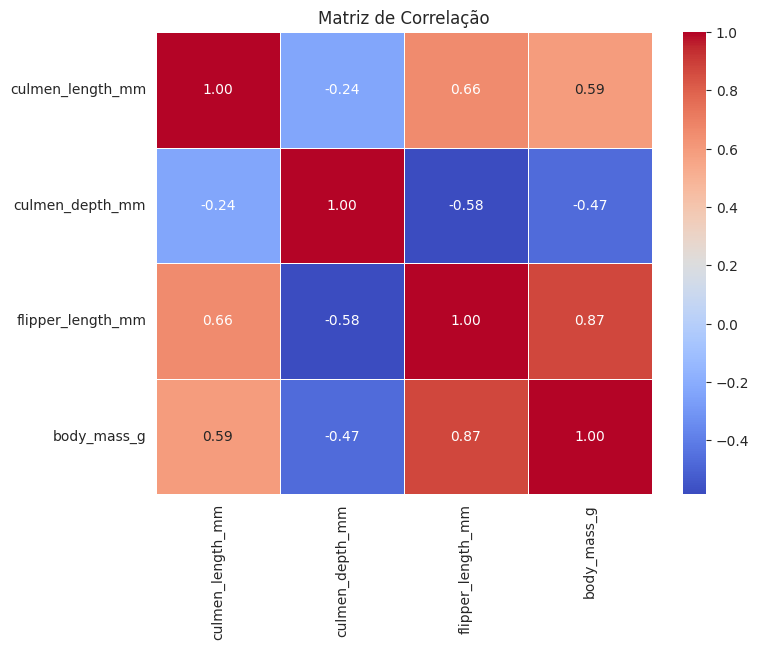

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

A matriz de correlação mostra que flipper_length_mm e body_mass_g possuem forte relação positiva, indicando que pinguins maiores também pesam mais. O comprimento do bico também se correlaciona moderadamente com o tamanho da barbatana. Já culmen_depth_mm apresenta correlações negativas com outras medidas, o que ajuda a distinguir espécies menores, como Adelie. Essas relações indicam quais variáveis são mais informativas para separação entre espécies.